# Аналитика в авиакомпании


## Описание проекта

Нужно понять есть ли спрос на рейсы в города, где проходят фестивали.

### Описание данных

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#model = pd.read_csv('C://Users/pm/Desktop/Практикум/datasets/Аэропорты и фестивали/query_1.csv') 
model = pd.read_csv('/datasets/query_1.csv')
model.head(8)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
#flights = pd.read_csv('C://Users/pm/Desktop/Практикум/datasets/Аэропорты и фестивали/query_3.csv')
flights = pd.read_csv('/datasets/query_3.csv') 
flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [5]:
flights['average_flights'] = flights['average_flights'].astype('int64')

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [7]:
print('Количество дублей в рейсах:', flights.duplicated().sum(), 'шт.')

Количество дублей в рейсах: 0 шт.


### Вывод

В обеих таблицах нет пропусков и дубликатов. Тип данных я поменяла только в среднем числе рейсов в городах, т.к. рейс меньше 1 в жизни не бывает. Названия колонок прописаны корректно, замены не нужны.

## Шаг 2. Анализ данных

In [8]:
top_10 = flights.sort_values('average_flights', ascending=False).reset_index(drop = True).head(10)
top_10

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Екатеринбург,11
4,Красноярск,11
5,Пермь,10
6,Ростов-на-Дону,10
7,Брянск,10
8,Ульяновск,9
9,Советский,9


In [9]:
print('Разница в количестве рейсов топ-1 и топ-2 городов:', round(top_10['average_flights'][0] / top_10['average_flights'][1],2), 'раза')

Разница в количестве рейсов топ-1 и топ-2 городов: 4.16 раза


Москва предсказуемо выделилась среди всех городов. У нее 5 аэропортов и это столица страны. Если сравнивать среднее число рейсов в день с другой не официальной столицей России Санкт-Петербургом, то разница получается в 4,16 раза. На графике это будет нагляднее

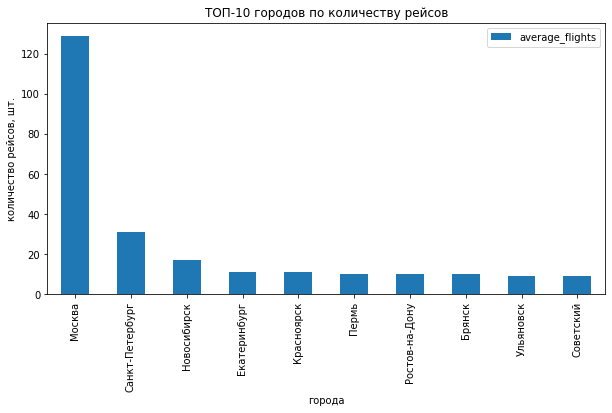

In [10]:
top_10.plot(kind='bar', x='city', y='average_flights', figsize=(10,5))
plt.title('ТОП-10 городов по количеству рейсов')
plt.xlabel("города")
plt.ylabel("количество рейсов, шт.")
plt.show()

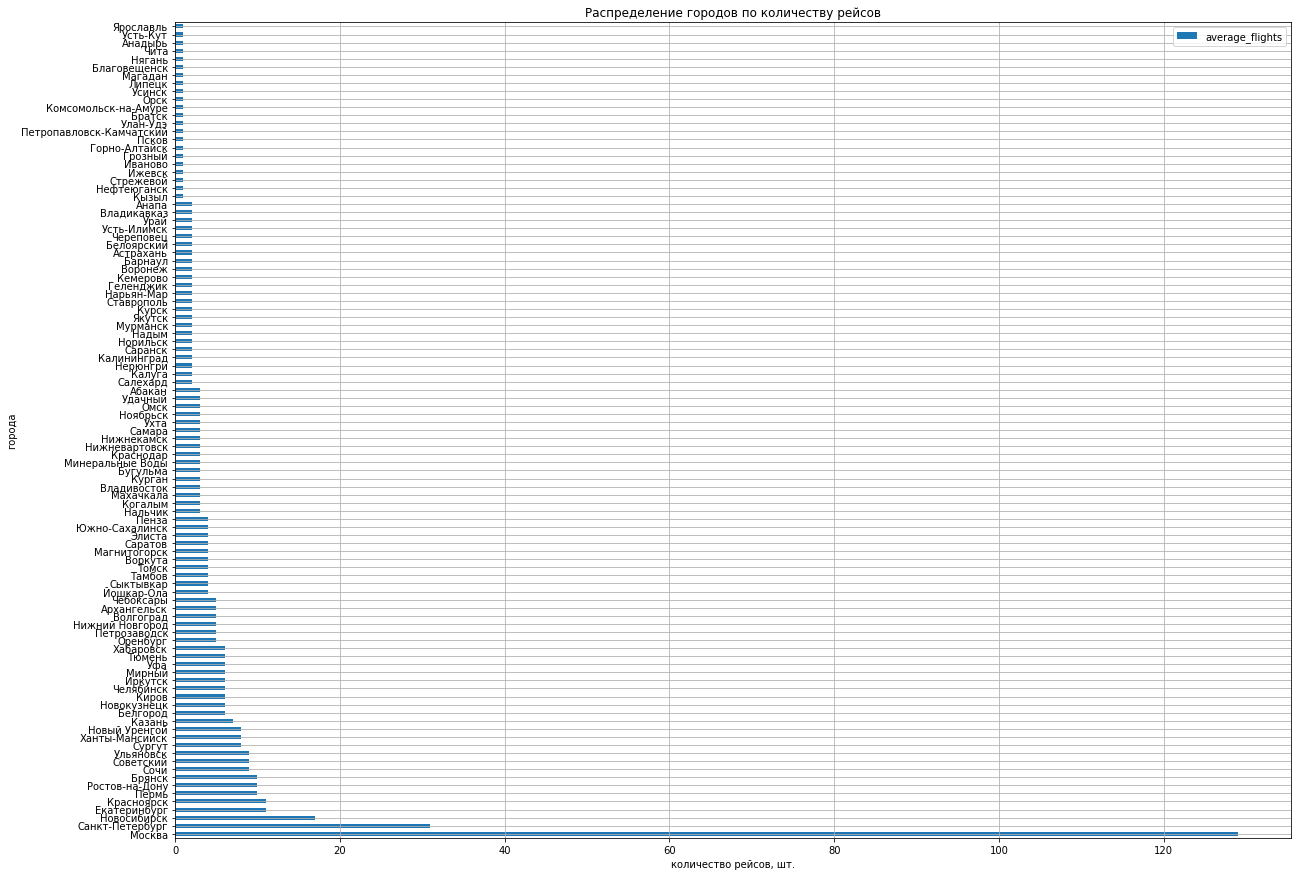

In [15]:
flights.sort_values('average_flights', ascending=False).reset_index(drop = True).plot(kind='barh', x='city', y='average_flights', figsize=(20,15), grid=True)
plt.title('Распределение городов по количеству рейсов')
plt.xlabel("количество рейсов, шт.")
plt.ylabel("города")
plt.show()

Теперь посмотрим на все города. Построим график с количеством рейсов и всеми городами, которые у нас есть. Т.к. всего городов много(100 шт), то на 1 графике это будет неудобно рассматривать. Поделю города по убыванию количества рейсов на 3 части.

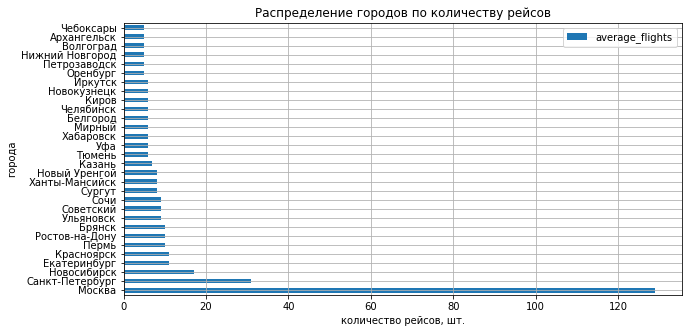

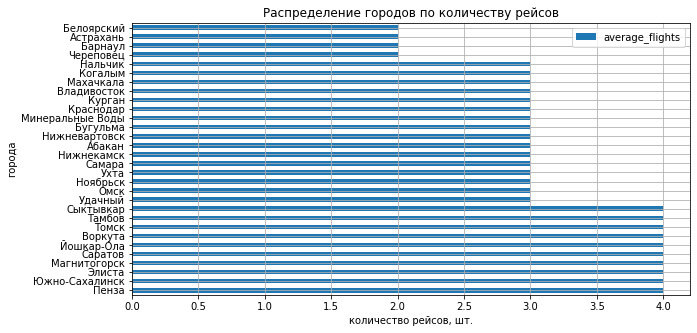

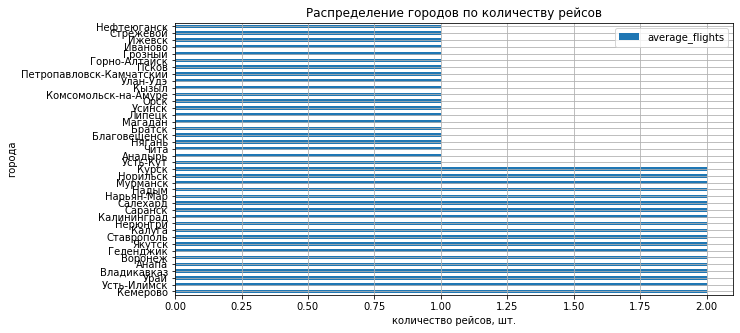

In [12]:
arr = [0, 30, 60, 100]
flights = flights.sort_values('average_flights', ascending=False).reset_index(drop = True)
for i in range(len(arr)-1):
    flights[arr[i]:arr[i+1]].plot(kind='barh', x='city', y='average_flights', figsize=(10,5), grid=True)
    plt.title('Распределение городов по количеству рейсов')
    plt.xlabel("количество рейсов, шт.")
    plt.ylabel("города")
    plt.show()

По графикам видно, что большое количество городов в 2018 году в августе принимало меньше 5 рейсов. Уже в ТОП-10 городов по количеству рейсов у последних двух городов было меньше 10 рейсов в сутки.
Дальше посмотрим, какие модели самолетов совершили больше всего рейсов.

In [13]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


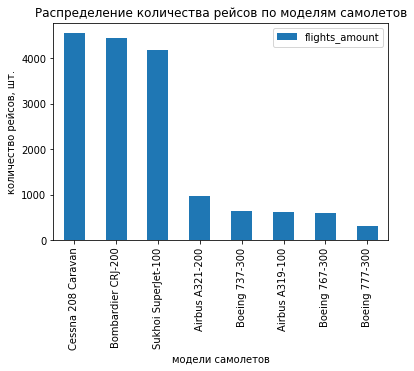

In [14]:
model.sort_values('flights_amount', ascending=False).plot(kind='bar', x='model', y='flights_amount')
plt.title('Распределение количества рейсов по моделям самолетов')
plt.xlabel("модели самолетов")
plt.ylabel("количество рейсов, шт.")
plt.show()

У первых 3 моделей самолетов было намного больше рейсов в сентябре 2018 года, чем у остальных. Даже если соединить модели Airbus и Boeing, то они все равно они будут отставать по количеству рейсов от первой тройки. Airbus = 1567 рейсов, Boeing = 1530. Получается, что самые популярные модели самолетов, у которых самое больше количество рейсов это:
1. Cessna 208 Caravan	
2. Bombardier CRJ-200	
3. Sukhoi SuperJet-100	

Интересный момент, что модель Cessna 208 Caravan вмещает в себя максимально 13 пассажиров, т.е. это малогабаритная модель, в отличие от других представленных моделей. Возможно, этим объясняется такое больше количество рейсов, они мобильнее.

### Вывод

Получаем из анализа, что в Москве самое большое количество рейсов в день 129 шт. На это есть адекватные причины - столица страны и 5 аэропортов. В других городах на порядок меньше. Можно предположить, что в Москву съезжаются люди из других городов по разным причинам.
На первом месте по количеству рейсов занял малогабаритная модель Cessna 208 Caravan 4557 рейсов.

## Шаг 3. Общий вывод

В ходе исследования у нас было недостаточно данных, чтобы отвергнуть или не отвергать гипотезу о том, что спрос на направления, где проходят фестивали, увеличивается. Можно только предположить, что спрос практически не меняется. Также можно предположить, что пассажиры пользуются други транспортом, чтобы добраться до фестиваля. 
Выяснилось, что в Москву в день в среднем прилетает самое большое количество пассажиров относительно других городов. И самой популярной моделью самолета является малогабартиный самолет модели Cessna 208 Caravan.